# 组合模型（Combining Models）

## 1. Committee and Bootstrap 

前面已经介绍过很多方法了。在实际使用中, 把它们结合起来往往能提高性能。例如,

- 委员会投票（并行）
- boosting（串行）
- 决策树（每部分用一种）与随机森林

### Committees（委员会）

- **训练多个不同的模型，取其平均值作为最终预测值。**

- 理论依据：偏差-方差分解

$$\left\langle\left[f\left(x_0\right)+\varepsilon-\hat{f}\left(x_0 \mid D\right)\right]^2\right\rangle=\left\langle\varepsilon^2\right\rangle+\operatorname{Bias}^2\left[f\left(x_0\right)\right]+\operatorname{Var}\left[f\left(x_0\right)\right]$$

- 方差可通过对多个模型的平均来减小

- 有 $M$ 个模型, 委员会的预测结果:
$$
y_{\text {com }}(\mathbf{x})=\frac{1}{M} \sum_{m=1}^M y_m(\mathbf{x})
$$

- 第 $m$ 个模型与真实值 $h(\mathbf{x})$ 的关系: 
$$y_m(\mathbf{x})=h(\mathbf{x})+\epsilon_m(\mathbf{x})$$

  - 其均方误差为: 
  $$e r r_m=\left\langle\left[y_m(\mathbf{x})-h(\mathbf{x})\right]^2\right\rangle=\left\langle\epsilon_m(\mathbf{x})^2\right\rangle$$
  
- 委员会预测的均方误差为
$$
\operatorname{err}_{\mathrm{com}}=\left\langle\left[\frac{1}{M} \sum_{m=1}^M y_m(\mathbf{x})-h(\mathbf{x})\right]^2\right\rangle=\left\langle\left[\frac{1}{M} \sum_{m=1}^M \epsilon_m(\mathbf{x})\right]^2\right\rangle
$$

- 如果假设不同模型的 $\epsilon_m$ 都是零均值 $\left.\left\langle\epsilon_m(\mathbf{x})\right\rangle=0\right)$ 且互不相关 $\left(\left\langle\epsilon_m(\mathbf{x})\right\rangle=\left\langle\epsilon_m(\mathbf{x}) \epsilon_n(\mathbf{x})\right\rangle=0\right)$ ，则
$$
\operatorname{err}_{\text {com }}=\frac{1}{M^2} \sum_{m=1}^M\left\langle\epsilon_m(\mathbf{x})^2\right\rangle=\frac{1}{M}\left\langle e r r_m\right\rangle
$$

- 通常性能的改善不会这么多, 但总有 $e r r_{\mathrm{com}} \leq\left\langle e r r_m\right\rangle$

### bootstrap

- 基于同一个原始数据集, 利用重采样技巧训练 $M$ 个模型 Bootstrap：自抽样法、拔靴法、自举法、自展法

- 做法:

  - 对容量为 $N$ 的原始数据样本, 按 “有放回抽样” 的方法抽取一个容量为 $N$ 的样本称为bootstrap样本;

  - 重复 $M$ 次, 即得到 $M$ 个样本, 分别用于训练 $M$ 个模型。

- 在统计上, Bootstrap可用于估计总体的分布特性。

- 在机器学习上, 用于创造数据的随机性。

- 与Committees方法结合时, 称为bagging (bootstrap aggregating)

  - 自举汇聚法、袋装法

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 创建一个合成数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建一个基于决策树的 Bagging 分类器
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# 训练模型
bagging_clf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = bagging_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


## Boosting 与 Adaboosting

### Boosting（提升法）

- Trained in sequence（顺序训练、串行训练）。

- 可以将多个弱分类器结合，取得很好的预测效果。

- **训练时，考虑数据点的权重。训练完一个分类器模型，该模型分错的，在下一个模型训练时，增大权重；分对的，减少权重。**

- 相当于用一些模型做“基”(base)。
  - 理论依据：减少偏差。
  
  - 例子：AdaBoost
    - adaptive boosting
    - （自适应提升法）
    - 是强有力的机器学习工具之一。

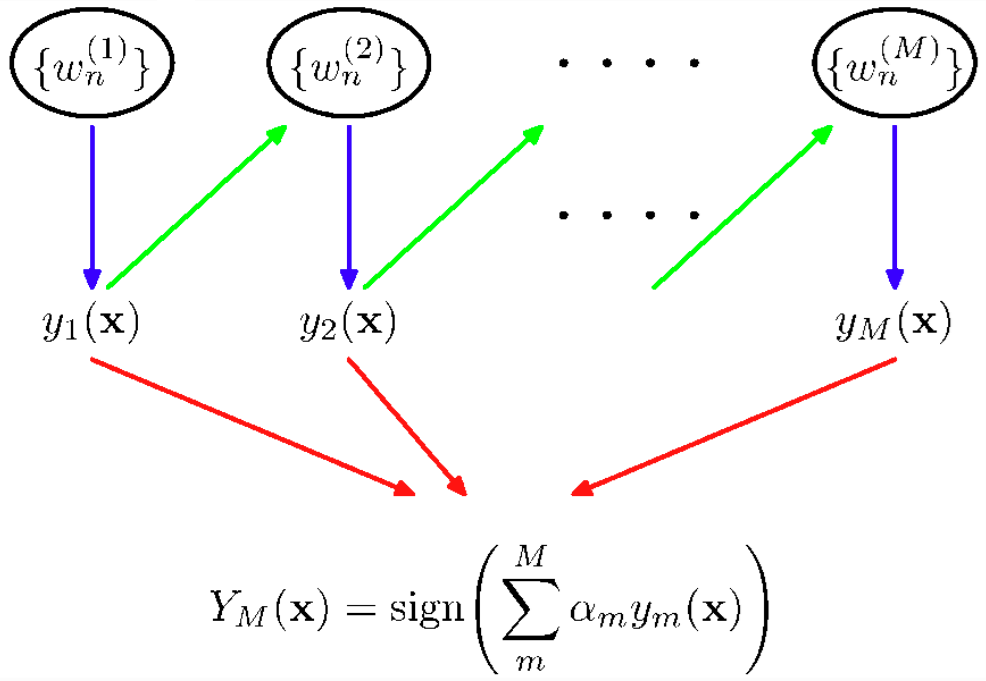


### AdaBoost

1. 初始权重: $w_n^{(1)}=\frac{1}{N}$

2. 对模型 $m$

  - 训练模型: 极小化误差函数 $J_m=\sum_{n=1}^N w_n^{(m)} I\left(y_m\left(\mathbf{x}_n\right) \neq t_n\right)$

    - $I$ 预测错时等于 1 , 否则 0
    $$
    t_n \in\{-1,1\}
    $$
  - 计算: $\epsilon_m=\dfrac{\sum_{n=1}^N w_n^{(m)} I\left(y_m\left(\mathbf{x}_n\right) \neq t_n\right)}{\sum_{n=1}^N w_n^{(m)}}, \quad \alpha_m=\ln \frac{1-\epsilon_m}{\epsilon_m}$
  
  - 更新权重: $w_n^{(m+1)}=w_n^{(m)} \exp \left\{\alpha_m I\left(y_m\left(\mathbf{x}_n\right) \neq t_n\right)\right\}$

3. 预测 :
$$
y_{\mathrm{ada}}=\operatorname{sign}\left(\sum_{m=1}^M \alpha_m y_m(\mathbf{x})\right)
$$

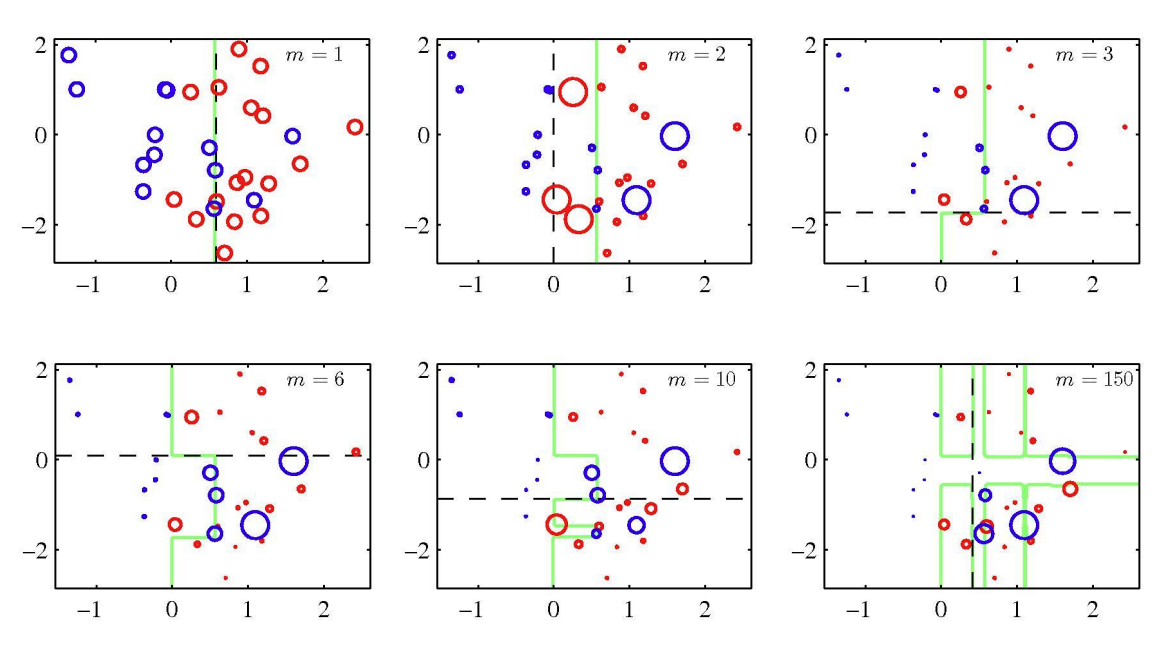

- 从数学上讲，AdaBoost等价于逐步极小化下面的指数误差
$$
E=\sum_{n=1}^N \exp \left[-t_n f_m\left(\mathbf{x}_n\right)\right]
$$

其中
$$
f_m\left(\mathbf{x}_n\right)=\frac{1}{2} \sum_{l=1}^m \alpha_l y_l\left(\mathbf{x}_n\right)
$$

- 每次新加一个分类器，只对新加入的分类器进行优化。

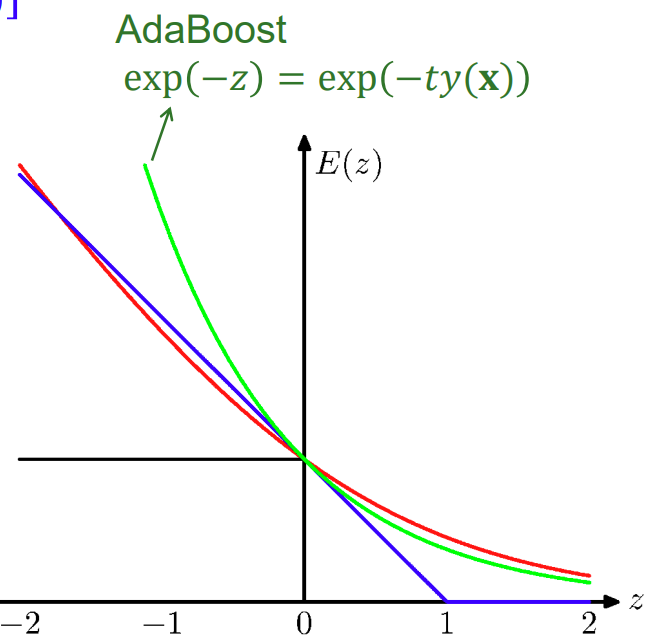

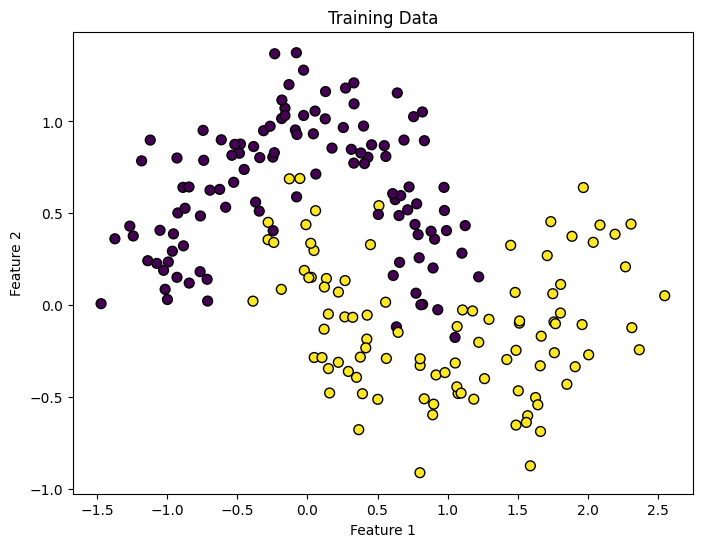

Accuracy: 0.97


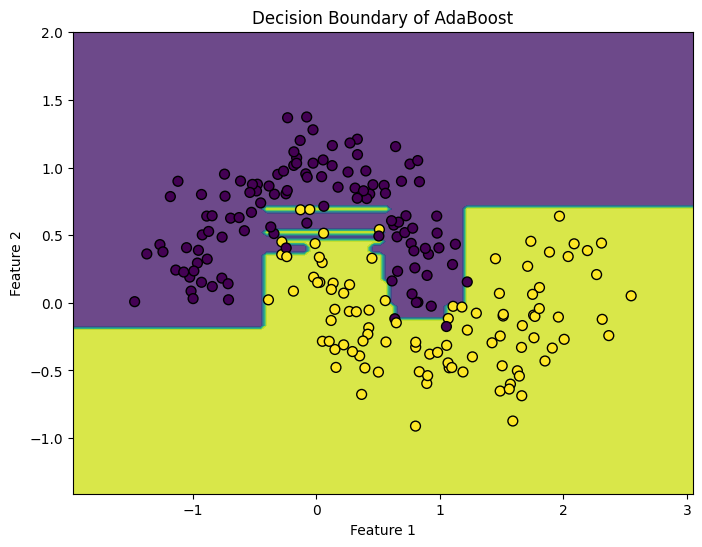

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# 创建一个二维数据集
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 可视化数据集
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 创建 AdaBoost 分类器
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# 训练模型
ada_boost.fit(X_train, y_train)

# 创建网格以绘制决策边界
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 预测网格点的类别
Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 计算准确率
accuracy = ada_boost.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("Decision Boundary of AdaBoost")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




## 决策树与随机森林

### 决策树

- 需要哪些节点，节点上选择什么变量作为判断依据，判断的阈值是多大，以及每个区域（叶子节点）的预测值。
  - 例如，在回归中，将区域中已知数据的平均值作为预测值。
- 树的结构用 **贪心策略（greedy optimization）** 来构建。
  - 从根节点开始（对应整个输入空间），逐步将当前节点的空间划分为两部分，划分方案根据残差最小的标准来选取。
    - 穷举。
  - 何时停止增加节点：残差小于某个阈值；更好的做法是先构造一棵最大的数（每个叶子节点只有一个数据），再剪枝。


### 树的剪枝…

- 剪枝的判据：极小化如下目标函数：
$$
C(T)=\sum_{\tau=1}^{|T|} Q_\tau(T)+\lambda|T|
$$

  - $|T|$ 是叶子节点的数目。
  - $\lambda$ 类似于正则化系数, 控制误差与叶子数之间的平衡口 $Q_\tau(T)$ 是叶子 $\tau$ 的误差, 在回归问题中是均方误差
    $$
    Q_\tau(T)=\sum_{\mathbf{x}_n \in \mathcal{R}_\tau}\left(t_n-y_\tau\right)^2
    $$

  - 在分类问题中则使用交叉熵: $Q_\tau(T)=\sum_{k=1}^K p_{\tau k} \ln p_{\tau k}$或基尼系数: $Q_\tau(T)=\sum_{k=1}^K p_{\tau k}\left(1-p_{\tau k}\right)$


### 决策树的优缺点

- 优点：直观，可解释性好。

- 缺点：
  - 对训练数据比较敏感；
  - 每个节点对输入空间的划分都是根据某个分量来划分的；
  - 硬分类。


## 随机森林（Random Forests）

- 利用模型平均来减少方差的要求：偏差小、方差大且模
型间互不相关。

- 决策树是好的选择：
  - 只要深度足够，偏差总会很小；
  - 对数据敏感，即方差大
  


- 随机森林：利用多棵决策树对样本进行训练并预测口利用bootstrap采样来产生训练集

  - 训练时每个节点随机选择 $d(<D)$ 个特征, 表现最好的一个被采用。
  - 预测: 各棵决策树预测结果的平均, 具有概率含义。

- 假设单个模型的方差为 $\left\langle\left[\Delta y_i\right]^2\right\rangle=\epsilon^2$, 模型之间的相关系数为 $C$ (即 $\left\langle\Delta y_i \Delta y_j\right\rangle=C \epsilon^2$ ), 则 $M$ 个模型平均预测结果的方差为
$$
\left\langle\left[\Delta y_{\mathrm{com}}\right]^2\right\rangle=C \epsilon^2+\frac{1-C}{M} \epsilon^2
$$

因此，模型之间越独立越好。

- 通过在节点上随机选择 $d(<D)$ 个特征, 可以增加模型之间的独立性。

  - 可选 $d=\sqrt{D}$, 甚至 $d=1$

随机森林（Random Forest）是一种集成学习方法，用于分类、回归和其他任务。它通过构建多个决策树（decision trees）并输出单个模型的平均预测结果来工作。随机森林模型的关键在于它结合了多个决策树的结果，从而通常比单个决策树模型更为准确和稳健。

### 数学原理和步骤

1. **Bootstrap Aggregating（Bagging）**:
   - 随机森林依赖于强大的统计方法“自助聚合”（bootstrap aggregating，或简称bagging）。
   - 在训练每棵树时，随机森林从原始训练数据中使用带替换的抽样方法（bootstrap sampling）随机选择样本，即一个样本可能被多次抽取。
   - 这种方法产生了不同的训练数据子集，这些子集用于训练不同的决策树。

2. **构建决策树**:
   - 对于每个数据子集，构建一棵决策树。
   - 在构建决策树时，每次分裂节点时，随机森林不是考虑所有的特征，而是从特征的一个随机子集中选择最佳分裂特征。
   - 这增加了树之间的多样性，并且有助于提高模型的泛化能力。

3. **聚合结果**:
   - 随机森林最终的预测是基于所有决策树的预测结果的平均值（回归问题）或多数投票（分类问题）。

### 优点

- **鲁棒性**：由于随机森林合并了许多决策树的结果，因此通常比单个决策树更准确。
- **泛化能力强**：随机选取特征和样本减少了过拟合的风险。
- **重要性评分**：随机森林可以提供关于特征重要性的洞察。
- **适用性广**：既可以用于分类问题，也可以用于回归问题。

### 缺点

- **模型解释性差**：与单个决策树相比，随机森林由于其复杂性，在解释性方面存在劣势。
- **计算密集型**：构建许多树可能需要更多的计算资源和时间。

在实践中，随机森林是一个非常强大且受欢迎的机器学习工具，它在各种数据集上都表现出色。

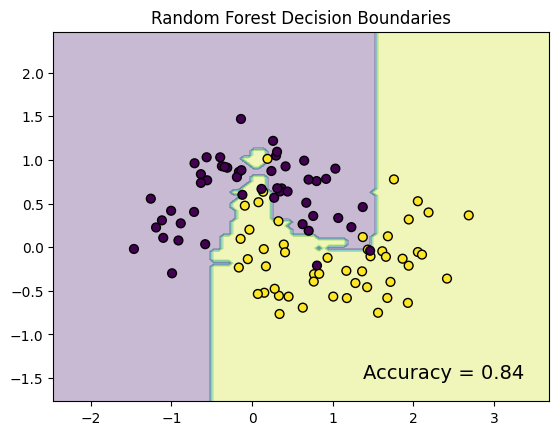

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 可视化函数
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_title("Random Forest Decision Boundaries")

# 创建图像和轴
fig, ax = plt.subplots()

# 绘制决策边界
plot_decision_boundaries(X, y, rf, ax)

# 计算准确率
accuracy = rf.score(X_test, y_test)
ax.text(0.95, 0.05, f"Accuracy = {accuracy:.2f}", ha='right', va='bottom', transform=ax.transAxes, fontsize=14)

# 显示图像
plt.show()


## 进阶版的随机森林

- **提升树（Boosting Tree）**：将Boosting与决策树结合。

- **梯度提升决策树（Gradient Boosting Decision Tree, GBDT）**：以残差 $y-F_{t-1}(x)$ 或其近似值 $\left[\dfrac{\delta L(y, F(x))}{\delta F(x)}\right]_{F(x)=F_{t-1}(x)}$ (梯度) 作为下一棵树的学习目标。

- **极限梯度提升树（XGBoost）**
  - 进一步利用二阶导数;
  - 非常好的工程实现;
  - 在Kaggle竞赛中广泛采用。

### Gradient Boosting Decision Tree

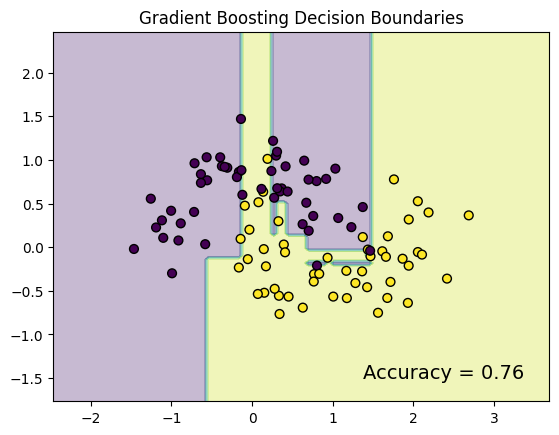

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 创建梯度提升分类器实例
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 训练模型
gb.fit(X_train, y_train)

# 可视化函数
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_title("Gradient Boosting Decision Boundaries")

# 创建图像和轴
fig, ax = plt.subplots()

# 绘制决策边界
plot_decision_boundaries(X, y, gb, ax)

accuracy = gb.score(X_test, y_test)
ax.text(0.95, 0.05, f"Accuracy = {accuracy:.2f}", ha='right', va='bottom', transform=ax.transAxes, fontsize=14)

# 显示图像
plt.show()


## Boosting Tree

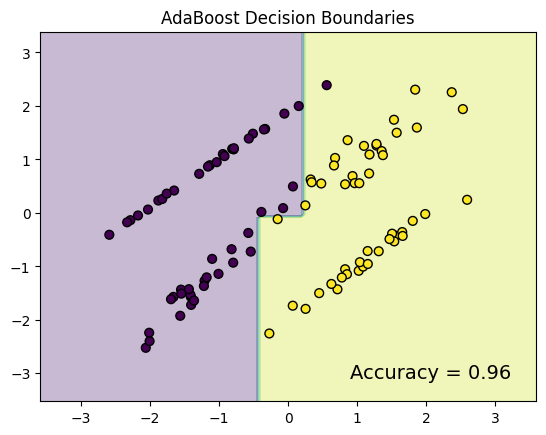

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 创建AdaBoost分类器实例，使用决策树作为基学习器
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# 训练模型
ada_boost.fit(X_train, y_train)

# 可视化函数
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_title("AdaBoost Decision Boundaries")

# 创建图像和轴
fig, ax = plt.subplots()

# 绘制决策边界
plot_decision_boundaries(X, y, ada_boost, ax)

# 计算准确率
accuracy = ada_boost.score(X_test, y_test)
ax.text(0.95, 0.05, f"Accuracy = {accuracy:.2f}", ha='right', va='bottom', transform=ax.transAxes, fontsize=14)

# 显示图像
plt.show()


## XGBoost (eXtreme Gradient Boosting)

In [17]:
%pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ------------------------------------- 125.4/125.4 MB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


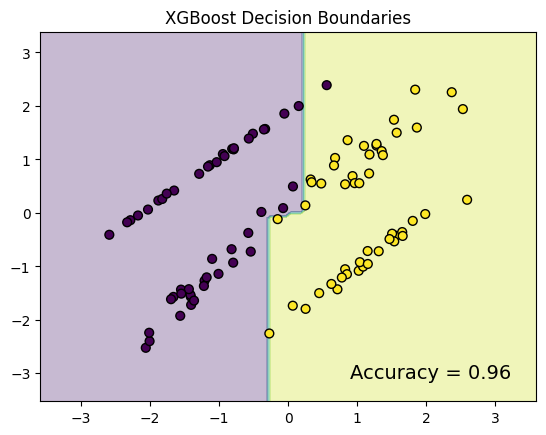

In [18]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 创建XGBoost分类器实例
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 训练模型
xgb_model.fit(X_train, y_train)

# 可视化函数
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_title("XGBoost Decision Boundaries")

# 创建图像和轴
fig, ax = plt.subplots()

# 绘制决策边界
plot_decision_boundaries(X, y, xgb_model, ax)

# 计算准确率
accuracy = xgb_model.score(X_test, y_test)
ax.text(0.95, 0.05, f"Accuracy = {accuracy:.2f}", ha='right', va='bottom', transform=ax.transAxes, fontsize=14)

# 显示图像
plt.show()
